In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
print(os.getcwd())

c:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project


In [4]:
Covid = os.listdir("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\Covid")
Normal=os.listdir("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\Normal")
Viral_Pneumonia=os.listdir("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\Viral Pneumonia")

In [5]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\CNN_model.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\X_ray_(Covid_19_Pneumonia)_Heat_map.ipynb
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0100.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0102.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0105.png
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0106.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0108.jpeg
C:\Users\shrey\Desktop\Amrita Vishwa Vidyapeetham\Semester 5\19CSE305\ml mini project\Covid19-dataset\test\Covid\0111.jpg
C:\Users\shrey\Desktop\Amrita Vish

In [6]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D,InputLayer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
train_dir = r"C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\train\\"
test_dir = r"C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\Covid19-dataset\\test\\"


In [8]:
categories = ['Covid','Normal']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10

In [9]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

In [10]:
x_train[0]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [11]:
y_train[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

In [12]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

In [13]:
x_test[0]

array([[[0.97647059, 0.97647059, 0.97647059],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        ...,
        [0.87058824, 0.87058824, 0.87058824],
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.97254902, 0.97254902, 0.97254902],
        [0.96470588, 0.96470588, 0.96470588],
        ...,
        [0.62352941, 0.62352941, 0.62352941],
        [0.61960784, 0.61960784, 0.61960784],
        [0.61960784, 0.61960784, 0.61960784]],

       [[0.85882353, 0.85882353, 0.85882353],
        [0.81960784, 0.81960784, 0.81960784],
        [0.79607843, 0.79607843, 0.79607843],
        ...,
        [0.12156863, 0.12156863, 0.12156863],
        [0.11764706, 0.11764706, 0.11764706],
        [0.11764706, 0.11764706, 0.11764706]],

       ...,

       [[0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0

In [14]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train,num_classes=2)
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test,num_classes=2)

In [15]:
x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')


In [16]:
model = Sequential()
model.add(InputLayer(input_shape=(500,500,3)))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2,activation='softmax'))

In [17]:
opt = Adam(learning_rate=INIT_LR,decay=INIT_LR/Batch_Size)

In [18]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
validation_steps = len(y_test) // Batch_Size
History = model.fit(
    x_train,
    y_train,
    epochs=EPOCHES,
    steps_per_epoch=len(x_train)//Batch_Size,
    batch_size=Batch_Size,
    validation_steps=validation_steps
)

Epoch 1/10
5/5 [==============================] - 15s 2s/step - loss: 0.9704 - accuracy: 0.5437
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 0.4518 - accuracy: 0.7785
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.3054 - accuracy: 0.8993
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.2314 - accuracy: 0.9329
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.1742 - accuracy: 0.9664
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 0.1539 - accuracy: 0.9530
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.1133 - accuracy: 0.9750
Epoch 8/10
5/5 [==============================] - 12s 3s/step - loss: 0.0848 - accuracy: 0.9799
Epoch 9/10
5/5 [==============================] - 11s 2s/step - loss: 0.0684 - accuracy: 0.9799
Epoch 10/10
5/5 [==============================] - 11s 2s/step - loss: 0.0825 - accuracy: 0.9799


In [20]:
pred_result = model.predict(x_test,batch_size=Batch_Size)
pred_result = np.argmax(pred_result,axis=1)

2/2 [==============================] - 2s 448ms/step


In [22]:
pred_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [38]:
print(f"Classifiation Report:\n {classification_report(y_test.argmax(axis=1),pred_result,target_names=lb.classes_)}")

Classifiation Report:
               precision    recall  f1-score   support

       Covid       1.00      0.92      0.96        26
      Normal       0.91      1.00      0.95        20

    accuracy                           0.96        46
   macro avg       0.95      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



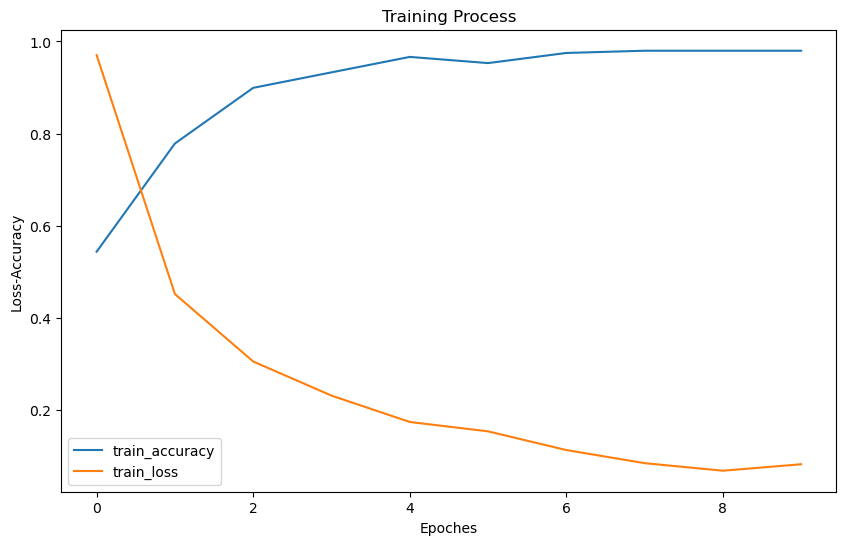

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,10),History.history['accuracy'],label='train_accuracy')
plt.plot(np.arange(0,10),History.history['loss'],label='train_loss')
plt.xlabel('Epoches')
plt.ylabel('Loss-Accuracy')
plt.title('Training Process')
plt.legend(loc='lower left')
plt.show()